# Advanced pandas Practice - Nashville City Cemetery

In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cemetery = pd.read_excel('/Users/rushichokshi/Documents/nss_da10/projects/advanced-pandas-rushichokshi/data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
#/Users/rushichokshi/Documents/nss_da10/projects/advanced-pandas-rushichokshi/data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

In [3]:
#2a
cemetery[(cemetery['Cause of Death/Burial']!='Unknown')&(cemetery['Cause of Death/Burial']!='Not Known')]['Cause of Death/Burial'].value_counts().sort_values(ascending=False).head(11)
#I decided to show the 11 most common because cholera showed up twice as one of them is a misspelling

Cause of Death/Burial
Consumption      1767
Still Born        841
Cholrea           667
Old Age           604
Cholera           575
Pneumonia         516
Flux              469
Complication      446
Cold              421
Teething          411
Typhoid Fever     310
Name: count, dtype: int64

In [4]:
cemetery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


In [5]:
#2b
cemetery = cemetery.replace('Still Born','Stillborn')
cemetery[cemetery['Cause of Death/Burial']=='Still Born']

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks


In [6]:
cemetery[cemetery['Cause of Death/Burial']=='Still Born']

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks


In [7]:
cemetery = cemetery.replace('Cholrea','Cholera')
cemetery[cemetery['Cause of Death/Burial']=='Cholrea']

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks


In [8]:
cemetery = cemetery.replace('Not Known','Unknown')


In [9]:
cemetery = cemetery.replace('Diarherea','Diarrhea')

In [10]:
cemetery = cemetery.replace('Feever','Fever')

3. Create a line chart showing the number of burials per year.

In [11]:
cemetery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


In [19]:
type(cemetery['Burial Year'].value_counts())

pandas.core.series.Series

In [14]:
cemetery['Burial Year'].nunique()

128

(array([7.220e+02, 4.470e+02, 7.450e+02, 8.090e+02, 3.850e+02, 5.520e+02,
        4.290e+02, 5.960e+02, 4.760e+02, 4.280e+02, 4.020e+02, 4.150e+02,
        4.820e+02, 5.750e+02, 4.550e+02, 6.270e+02, 8.360e+02, 1.372e+03,
        1.366e+03, 1.354e+03, 5.420e+02, 5.040e+02, 2.090e+02, 3.120e+02,
        2.850e+02, 8.420e+02, 3.370e+02, 1.590e+02, 1.480e+02, 1.550e+02,
        1.180e+02, 1.380e+02, 2.040e+02, 1.560e+02, 1.110e+02, 1.280e+02,
        9.900e+01, 6.900e+01, 7.000e+01, 6.700e+01, 5.000e+01, 5.000e+01,
        4.600e+01, 5.800e+01, 4.800e+01, 5.100e+01, 5.500e+01, 4.700e+01,
        4.200e+01, 5.200e+01, 3.700e+01, 9.000e+01, 3.600e+01, 3.700e+01,
        4.000e+01, 4.100e+01, 2.600e+01, 3.100e+01, 1.800e+01, 3.500e+01,
        2.900e+01, 2.800e+01, 3.500e+01, 2.200e+01, 1.900e+01, 3.000e+01,
        2.900e+01, 2.500e+01, 1.400e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.300e+01, 2.400e+01, 1.800e+01, 2.200e+01, 3.300e+01, 1.000e+01,
        1.600e+01, 2.800e+01, 1.200e+0

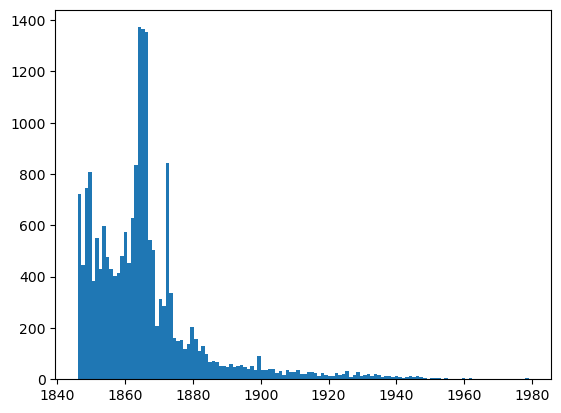

In [17]:
plt.hist(cemetery['Burial Year'],bins=128)